# Task:Wine Quality Prediction

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load data

In [3]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Checking null values

In [60]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


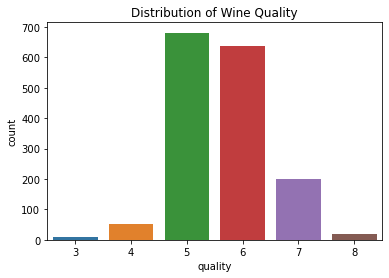

In [9]:
import seaborn as sns
sns.countplot(df['quality'])
plt.title('Distribution of Wine Quality')
plt.show()

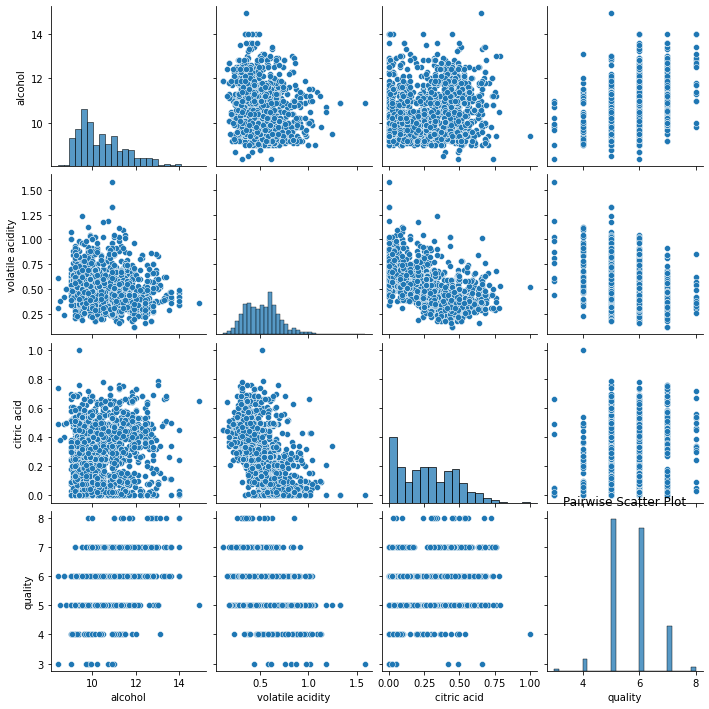

In [10]:
# scatter plot 
sns.pairplot(df[['alcohol', 'volatile acidity', 'citric acid', 'quality']])
plt.title('Pairwise Scatter Plot')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

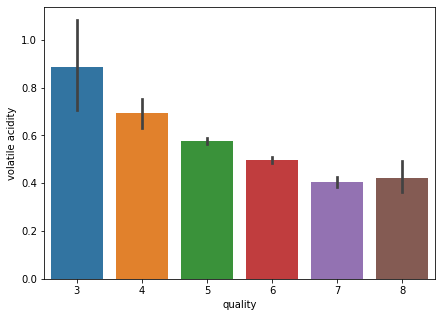

In [13]:
plot = plt.figure(figsize=(7,5)) 
sns.barplot(x = 'quality' , y='volatile acidity' , data = df)

# we can see that volatile acidity and quality are inversly propotional because higher the volatile acidity lower the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

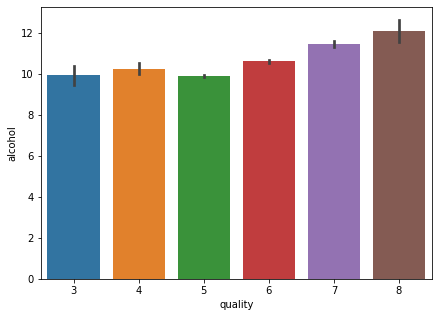

In [14]:
plot = plt.figure(figsize=(7,5)) 
sns.barplot(x = 'quality' , y='alcohol' , data = df)

# we can see that citric acid and quality are Directly Propotional because higher the citric Acid Higher the Quality of Wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

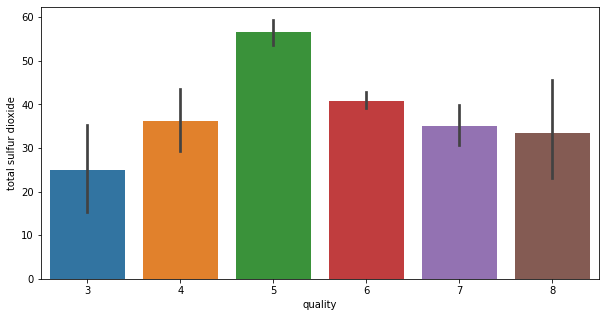

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide',data=df)

# Important insight we are getting here is that if the Total Sulphur Dioxide value is between 30 to 40 then the Quality of the wine is Excellent

In [16]:
df.shape

(1599, 12)

# Separate data into Features and Labels

In [29]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate features and labels
x = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [31]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

# Splitting Dataset

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [33]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression 
model_lg = LogisticRegression()
model_lg.fit(x_train_scaled,y_train)
Y_pred = model_lg.predict(x_test_scaled)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("Accuracy Score:",accuracy_score(y_test,Y_pred))

Accuracy Score: 0.865625


In [35]:
confusion_mat = confusion_matrix(y_test,Y_pred)
print(confusion_mat)

[[264   6]
 [ 37  13]]


In [36]:
report=classification_report(y_test,Y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       270
           1       0.68      0.26      0.38        50

    accuracy                           0.87       320
   macro avg       0.78      0.62      0.65       320
weighted avg       0.85      0.87      0.84       320



In [40]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scaled,y_train)
Y_pred = model_rf.predict(x_test_scaled)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("Accuracy Score:",accuracy_score(y_test,Y_pred))

Accuracy Score: 0.890625


In [41]:
confusion_mat = confusion_matrix(y_test,Y_pred)
print(confusion_mat)

[[269   1]
 [ 34  16]]


In [42]:
report=classification_report(y_test,Y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       270
           1       0.94      0.32      0.48        50

    accuracy                           0.89       320
   macro avg       0.91      0.66      0.71       320
weighted avg       0.90      0.89      0.87       320



In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_scaled,y_train)
Y_pred = model_rf.predict(x_test_scaled)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("Accuracy Score:",accuracy_score(y_test,Y_pred))

Accuracy Score: 0.890625


In [45]:
confusion_mat = confusion_matrix(y_test,Y_pred)
print(confusion_mat)

[[269   1]
 [ 34  16]]


In [46]:
report=classification_report(y_test,Y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       270
           1       0.94      0.32      0.48        50

    accuracy                           0.89       320
   macro avg       0.91      0.66      0.71       320
weighted avg       0.90      0.89      0.87       320



In [47]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest Classifier','Decision Tree'],
    'Score': [0.87,0.89,0.89]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.89,Random Forest Classifier
0.89,Decision Tree
0.87,Logistic Regression
